# Exploratory Data Analysis (EDA)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Exploration

In [3]:
# Load data
merged_df = pd.read_csv('../data/financials_vehicle_merged.csv')

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ann. Date      136 non-null    object 
 1   Quarter        136 non-null    object 
 2   Revenue        136 non-null    int64  
 3   PBT            136 non-null    int64  
 4   NP             136 non-null    int64  
 5   NP to SH       136 non-null    int64  
 6   NP Margin      136 non-null    object 
 7   ROE            136 non-null    object 
 8   EPS            136 non-null    float64
 9   DPS            136 non-null    float64
 10  NAPS           136 non-null    float64
 11  QoQ            136 non-null    object 
 12  YoY            136 non-null    object 
 13  Company        136 non-null    object 
 14  company        136 non-null    object 
 15  vehicle_count  136 non-null    int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 17.1+ KB


In [6]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,136.0,3.989758e+06,4.407250e+06,299360.000,745618.2500,2.709308e+06,4.354567e+06,18835000.00
PBT,136.0,1.535871e+05,2.211516e+05,-365803.000,21245.0000,9.588500e+04,2.501528e+05,1057000.00
NP,136.0,1.268215e+05,2.693960e+05,-377092.000,5390.7500,7.461300e+04,1.898992e+05,2340000.00
NP to SH,136.0,1.106529e+05,2.542374e+05,-306083.000,3803.7500,5.862300e+04,1.356100e+05,2288000.00
EPS,136.0,3.512426e+00,7.939517e+00,-15.830,0.5400,3.500000e+00,6.617500e+00,51.00
DPS,136.0,1.841912e+00,2.885322e+00,0.000,0.0000,0.000000e+00,3.000000e+00,11.75
NAPS,136.0,2.793935e+00,1.377121e+00,0.386,2.1175,3.279900e+00,3.887500e+00,4.63
vehicle_count,136.0,2.978496e+04,3.442320e+04,943.000,4197.0000,6.723000e+03,6.133775e+04,122053.00


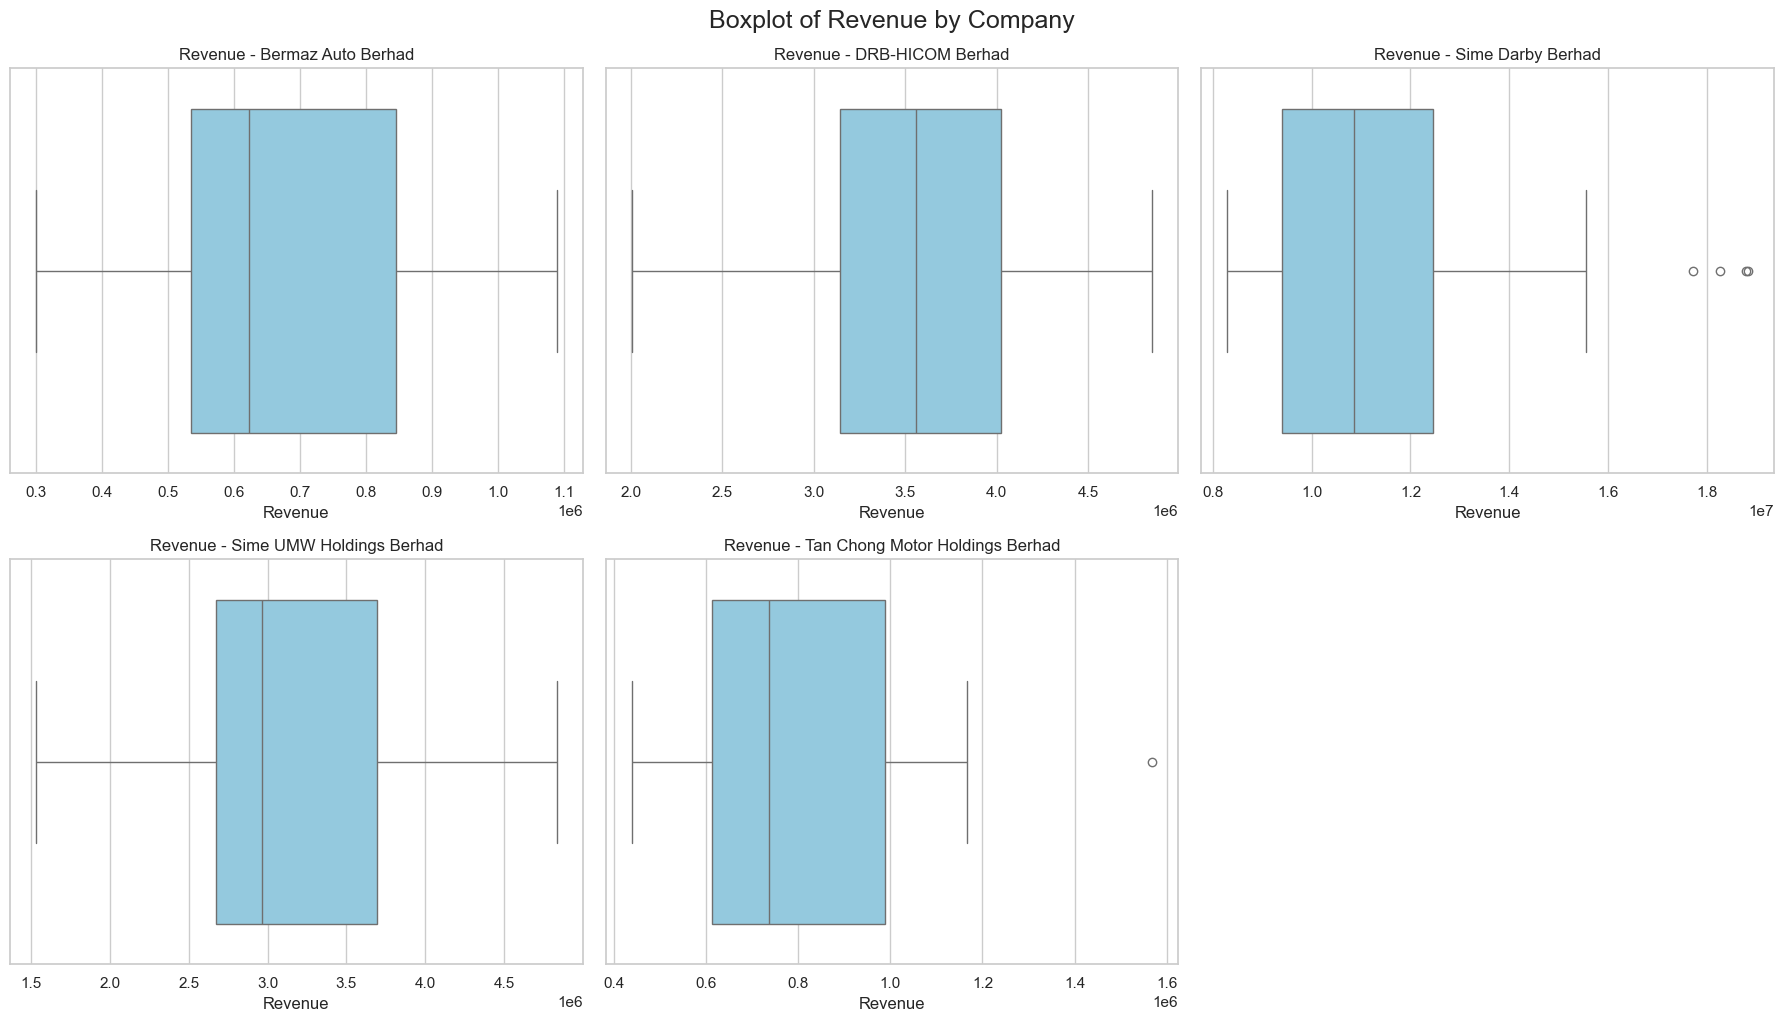

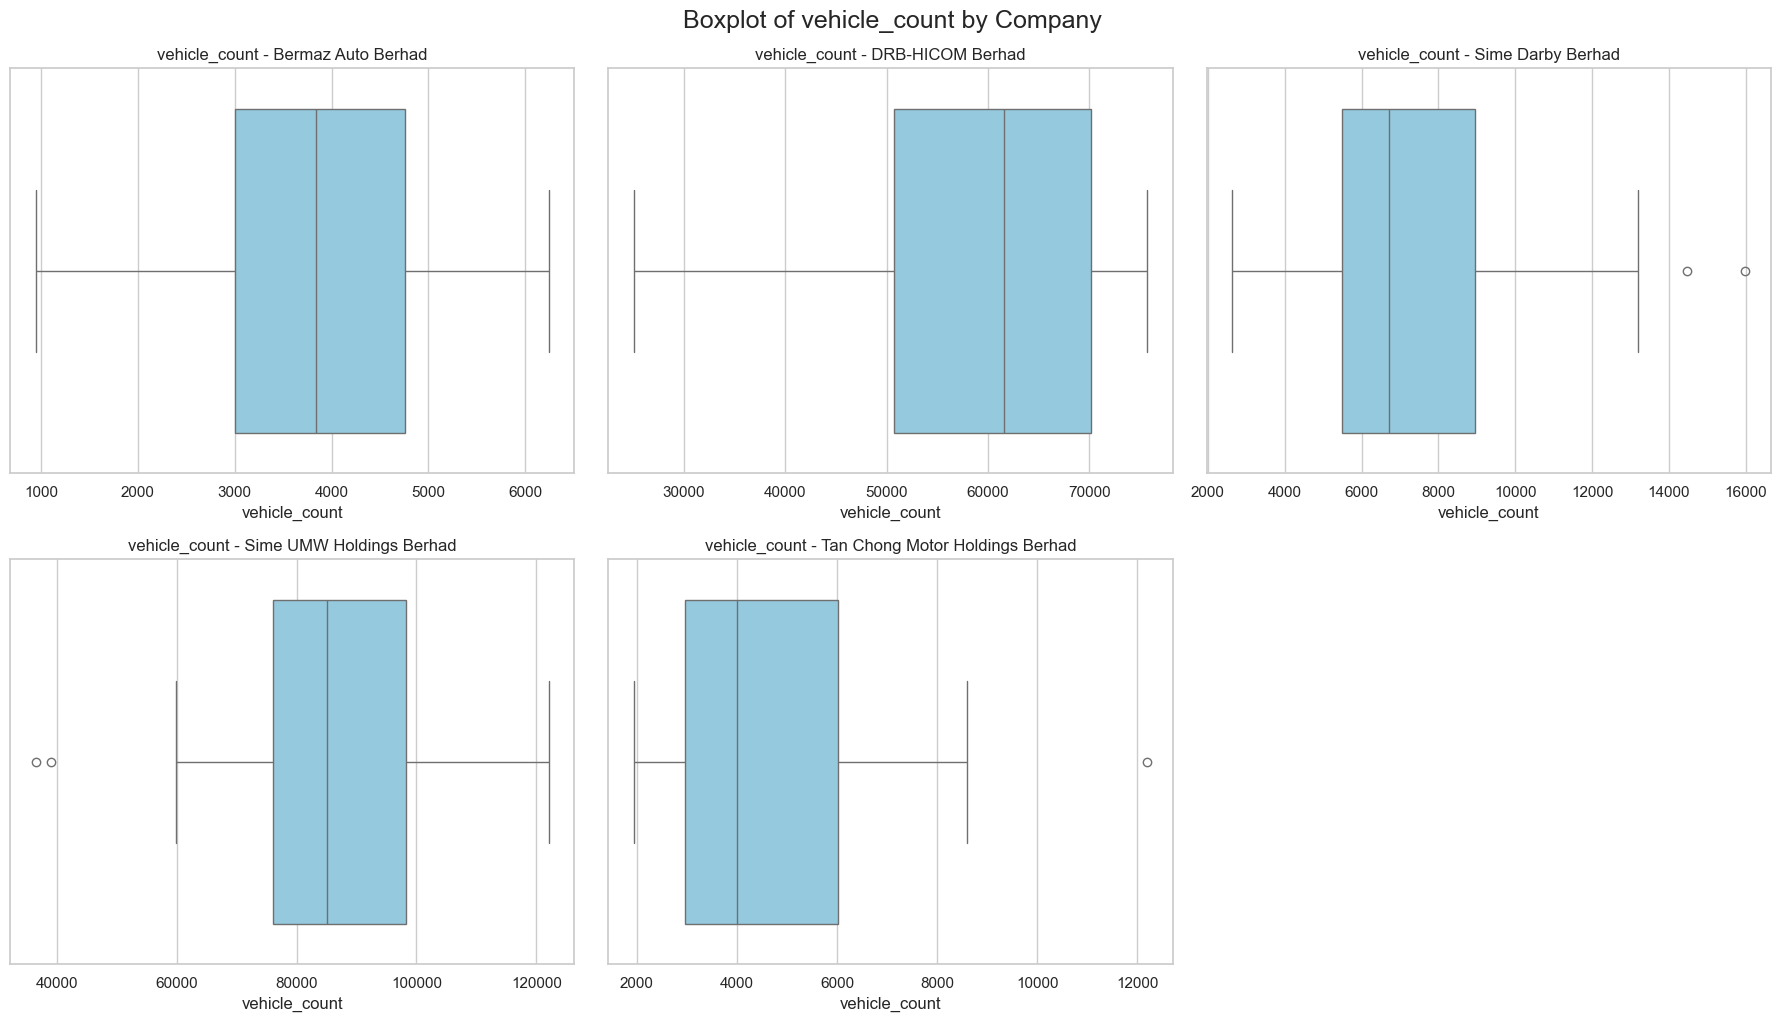

In [11]:
# Ensure plot style is consistent
sns.set(style="whitegrid")

# Define numeric columns to plot
numerical_cols = ['Revenue', 'vehicle_count']

# Get unique companies
companies = merged_df['Company'].unique()

# Plot each numeric column for each company
for num_col in numerical_cols:
    plt.figure(figsize=(18, 10))
    for i, company in enumerate(companies):
        plt.subplot(2, (len(companies)+1)//2, i+1)
        sns.boxplot(data=merged_df[merged_df['Company'] == company], x=num_col, color='skyblue')
        plt.title(f'{num_col} - {company}')
        plt.xlabel(num_col)
    plt.tight_layout()
    plt.suptitle(f'Boxplot of {num_col} by Company', fontsize=18, y=1.02)
    plt.show()


### Insights gained from data exploration

1. From TCMH's outliers, we found out that we might want to consider adding in other factors such as new model launching.\
***Reference:*** `The key earning catalysts include more new model launches` https://theedgemalaysia.com/node/450900

## Revenue vs Vehicle Registration Count

In [ ]:
import pandas as pd
import plotly.graph_objs as go

# Plot per company
companies = merged_df['Company'].unique()

for company in companies:
    df = merged_df[merged_df['Company'] == company].sort_values('Quarter')
    
    fig = go.Figure()
    
    # Revenue trace
    fig.add_trace(go.Scatter(
        x=df['Quarter'],
        y=df['Revenue'],
        name='Revenue',
        yaxis='y1',
        mode='lines+markers'
    ))
    
    # Vehicle count trace
    fig.add_trace(go.Scatter(
        x=df['Quarter'],
        y=df['vehicle_count'],
        name='Vehicle Count',
        yaxis='y2',
        mode='lines+markers'
    ))

    # Layout with dual axis
    fig.update_layout(
        title=f"{company} - Revenue vs Vehicle Count per Quarter",
        xaxis=dict(title='Quarter'),
        yaxis=dict(title='Revenue', side='left'),
        yaxis2=dict(title='Vehicle Count', overlaying='y', side='right'),
        legend=dict(x=0.01, y=0.99),
        template='plotly_white'
    )

    fig.show()

In [2]:
for company in merged_df['Company'].unique():
    df_company = merged_df[merged_df['Company'] == company]
    corr = df_company['Revenue'].corr(df_company['vehicle_count'])
    print(f"{company}: Correlation between Revenue and vehicle_count = {corr:.3f}")

Bermaz Auto Berhad: Correlation between Revenue and vehicle_count = 0.816
DRB-HICOM Berhad: Correlation between Revenue and vehicle_count = 0.905
Sime Darby Berhad: Correlation between Revenue and vehicle_count = 0.838
Sime UMW Holdings Berhad: Correlation between Revenue and vehicle_count = 0.899
Tan Chong Motor Holdings Berhad: Correlation between Revenue and vehicle_count = 0.971


### 📊 **General Observations**

1. **Strong Positive Correlation**\
All companies show strong positive correlations (ranging from 0.816 to 0.971) between vehicle registration volume and revenue, indicating:
    - Vehicle sales volume is a major driver of revenue in these automotive companies.
    - Higher vehicle registrations likely correspond to increased showroom deliveries, reflecting operational revenue recognition.

2. **Industry-Level Insight**\
The automotive industry’s financial performance, particularly revenue, is closely tied to operational output in terms of vehicle deliveries. Therefore:
    - Tracking monthly or quarterly vehicle registration can be a leading operational KPI for estimating revenue performance before official financials are published.

🏢 **Company-Specific Insights**
- **Bermaz Auto Berhad (Correlation: 0.816)**
    - Moderately strong correlation suggests that while vehicle count affects revenue, other factors (e.g., pricing strategies, mix of CKD/CBU models, or aftersales income) may also play a role.

    - Partly affected due to popularity of Mazda CX-5 and the impact of 2018 tax holiday. The Malaysian government's implementation of a "tax holiday" from June to August 2018, during which the Goods and Services Tax (GST) was set to 0%, led to a surge in vehicle sales. This resulted in a backlog of orders that extended into subsequent quarters. Consequently, even with a decrease in new vehicle registrations in Q3 FY2019, revenue remained robust due to the fulfillment of these prior orders. This indicate that we might want to consider factoring in `Government Policy`.

    ***Reference:*** https://www.thestar.com.my/business/business-news/2019/06/12/bermaz-auto-fy19-net-profit-jumps-to-rm265m-dividends-10pt5c 

- **DRB-HICOM Berhad (Correlation: 0.905)**
    - A very strong correlation suggests DRB-HICOM’s revenue is highly dependent on vehicle sales volume.

    - Implies limited contribution from non-vehicle revenue streams (e.g., finance, parts, or industrial segment).

- **Sime Darby Berhad (Correlation: 0.838)**
    - Revenue is significantly driven by vehicle registrations, though slightly lower than DRB-HICOM and Sime UMW.

    - May reflect diversified revenue streams (e.g., plantations, logistics, industrials) diluting direct impact from auto sales.

- **Sime UMW Holdings Berhad (Correlation: 0.899)**
    - High correlation shows strong dependence on automotive sales volume.

    - May imply operational efficiency in converting vehicle movement into top-line results.

- **Tan Chong Motor Holdings Berhad (Correlation: 0.971)**
    - Extremely high correlation, indicating near-linear relationship between vehicle registration and revenue.

    - Suggests a business model that is almost entirely reliant on vehicle sales, with minimal diversification or delay in revenue recognition.